In [1]:
import itertools
import json
import torch
import os
import sys

# job parallellization
from joblib import Parallel, delayed

# training loop
from src.training import train_experiment


pip install 'aif360[LawSchoolGPA]'


In [2]:
# Set the working directory
DIR = r'C:\Users\u0148775\PycharmProjects\DCF'
sys.path.append(DIR)
os.chdir(DIR)

# Experiment specs:

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
print(device)

cpu


In [4]:
# Load experiment and project settings from a JSON file
with open(os.path.join(DIR, 'config/projectconfig.json'), 'r') as f:
    projectconfig = json.load(f)

with open(os.path.join(DIR, 'config/experimentconfig.json'), 'r') as f:
    params = json.load(f)

In [5]:
# Define the experiment list by all combinations of the parameters (lambda, local_reg, MLP hyperparas, ...)
combinations = list(itertools.product(*params.values()))
experiments = [dict(zip(params.keys(), combination)) for combination in combinations]

# Add static or additional parameters not in the JSON files
for experiment in experiments:
    experiment.update({
        'enableWandb': projectconfig['enableWandb'],    # Enable Weights & Biases logging (True/False); config in DCF\config\projectconfig.json
        'wandb_project': projectconfig['wandbProject'], # Project name in Weights & Biases; config in DCF\config\projectconfig.json
        'log_screen': False,                            # Log verbose results to screen (True/False)
        'round': 0,
        'plot_result_per_epoch': False,                 # Plot distributions for each epoch
        'plot_result_last_epoch': True,                 # Plot distributions for the last epoch
        'threshold_based': True,                        # True: Decision area based on threshold (as done in the paper); False: Decision area based on percentile
        'allow_multiprocessing': True,                  # For parallellization on CPU cores
        'num_processes': 1,                             # For parallellization on CPU cores (Num. processes in parallel)
    })

## Training loop


Experiment started at:  18-04-25  |  14:16
*Experiment 1/2* Data: data/TelecomKaggle(informed_flip_0.5), local_reg: False, fair_reg: 2, lam: 0.4


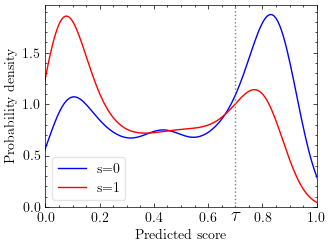

Partial AUC-PR (Precision above 0.868 ): 0.5890976825021301
Full AUC-PR: 0.8738777520705131


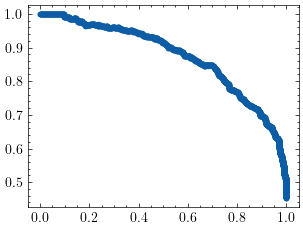

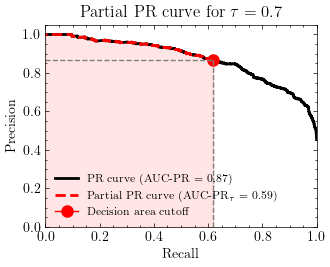

Training time: 0:03:21.110180

Experiment started at:  18-04-25  |  14:20
*Experiment 2/2* Data: data/TelecomKaggle(informed_flip_0.5), local_reg: True, fair_reg: 2, lam: 0.4


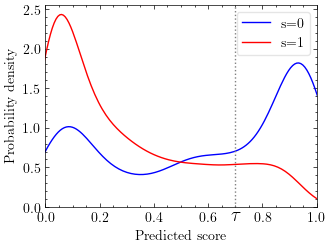

Partial AUC-PR (Precision above 0.8936742934051144 ): 0.609544586709865
Full AUC-PR: 0.8988888960691963


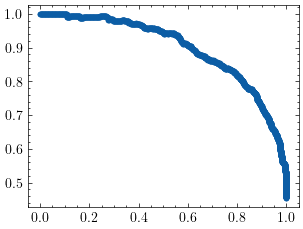

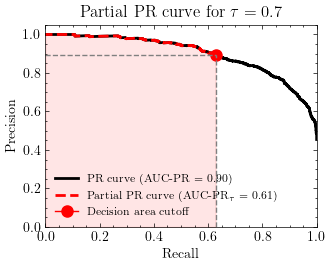

Training time: 0:02:03.330693
All experiments completed.


In [6]:
# Run the training loop
Parallel(n_jobs=experiment['num_processes'])(
    delayed(train_experiment)(experiment, counter, len(combinations)) for counter, experiment in
    enumerate(experiments, start=1))

# Done with all experiments
print("All experiments completed.")